In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor, RandomForestRegressor, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# model evaluation
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, auc, f1_score
# dataset visulization
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
# data resampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
# feature selection
from sklearn.feature_selection import VarianceThreshold, RFE, mutual_info_classif, SelectKBest
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
# model selection
from sklearn.model_selection import StratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier 

# Data Loading and process
- load data and check pupulation size
- split data to train and test data
- visualize high-dimensional datase by t-SNE and PCA

### load data and check pupulation size
- df: original data
- df_rename: 'Bankrupt?' : 'target', features: Attr1~Attr95

In [47]:
# Read in dataset
df = pd.read_csv('data.csv')
df_rename = df.copy()
population_size = len(df)
# Rename columns
df.rename(columns={'Bankrupt?' : 'target'},inplace=True)
index = 0
for col in df_rename.columns:
    if col == 'Bankrupt?':
        df_rename.rename(columns={col : 'target'},inplace=True)
    else:
        df_rename.rename(columns={col : 'Attr'+str(index)},inplace=True)
    index += 1    

# Checking data population
print("data shape:",df_rename.shape)
# Checking target incidence
print("\ndata incidence",df_rename.target.value_counts(normalize=True))

#basetable.columns

data shape: (6819, 96)

data incidence 0    0.967737
1    0.032263
Name: target, dtype: float64


$\implies$ 3% of target '1': imbalanced data</br>
$\implies$ 96 features: high-dimensional dataset


### split data to train and test data
- X: all features data
- y: target data
- X_train, X_test, y_train, y_teat splited by 'train_test_split' with test-size 0.3

In [48]:
# Assign Data to X and y
X = df_rename.drop(columns='target')
y = df_rename.target

### visualize the variance of high-dimensional datase

## Resample Imbalanced data
- Using imblearn library </br>
  1. Undersampling with RandomForest: </br>This technique eliminates or deletes the data points of the majority class to make an equal ratio of major and minor classes.There is a various method for undersampling like Tomek’s links, EditedNearestNeighbours, CondensedNearestNeighbour, InstanceHardnessThreshold, etc.
  2. Oversampling: </br>This technique redistributes randomly the minority class data points to increase the ratio in the dataset.It duplicates the existing data points of minority class and equalizes the ratio of majority and minority class.
  3. SMOTE (Synthetic Minority Oversampling Technique):</br>SMOTE selects the data points of the minority class in feature space to draw a line between those points and generate new points along with the line. Thus this technique synthesizes new data points for minority class and oversample that class.</br>This is the most effective method for oversampling.

# to-do Divya : piechat of imbalance data 

# to-do Ginny: Undersampling with RandomForest

In [76]:
# Undersampling
rus = RandomUnderSampler(random_state=0)
X_underSampling, y_underSampling = rus.fit_resample(X, y)
print("X_underSampling's shape:", X_underSampling.shape,"y_underSampling's shape:", y_underSampling.shape)
print("y_underSampling:\n",y_underSampling.value_counts(normalize=True))

X_underSampling's shape: (440, 95) y_underSampling's shape: (440,)
y_underSampling:
 0    0.5
1    0.5
Name: target, dtype: float64


### Oversampling

In [77]:
# Oversampling
ros = RandomOverSampler(random_state=0)
X_overSampling, y_overSampling = ros.fit_resample(X, y)
print("X_overSampling's shape:", X_overSampling.shape,"y_overSampling's shape:", y_overSampling.shape)
print("y_overSampling:\n",y_overSampling.value_counts(normalize=True))

X_overSampling's shape: (13198, 95) y_overSampling's shape: (13198,)
y_overSampling:
 1    0.5
0    0.5
Name: target, dtype: float64


### SMOTE

In [79]:
# SMOTE
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)
print("X_SMOTE's shape:", X_SMOTE.shape,"y_SMOTE's shape:", y_SMOTE.shape)
print("y_SMOTE:\n",y_SMOTE.value_counts(normalize=True))

X_SMOTE's shape: (13198, 95) y_SMOTE's shape: (13198,)
y_SMOTE:
 1    0.5
0    0.5
Name: target, dtype: float64


In [80]:
def testModels(models, models_name, X, y, data_name, f1Score, acurrency):
    f1Score.loc[data_name] = np.zeros(len(models))
    acurrency.loc[data_name] = np.zeros(len(models))
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.3,
        random_state=42,
        stratify=y
        )
    for md_name, md in zip(models_name,models):
        md.fit(X_train,y_train)
        y_pre=md.predict(X_test)
        f1Score[md_name][data_name] = f1_score(y_test, y_pre, average='macro')
        acurrency[md_name][data_name] = accuracy_score(y_test, md.predict(X_test))
        

In [81]:
# Find the best resampled dataset
models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier()]
models_name = ['RandomForestClassifier','LogisticRegression', 'KNeighborsClassifier']
data_name = ['Original','underSampling','overSampling','SMOTE']
models_f1Score = pd.DataFrame(columns=models_name, index=data_name)
models_acurrency = pd.DataFrame(columns=models_name, index=data_name)

In [82]:
testModels(models, models_name, X, y, 'Original', models_f1Score, models_acurrency)
testModels(models, models_name, X_underSampling, y_underSampling, 'underSampling', models_f1Score, models_acurrency)
testModels(models, models_name, X_overSampling, y_overSampling, 'overSampling', models_f1Score, models_acurrency)
testModels(models, models_name, X_SMOTE, y_SMOTE, 'SMOTE', models_f1Score, models_acurrency)
testModels(models, models_name, X_ADASYN, y_ADASYN, 'ADASYN', models_f1Score, models_acurrency)

/Users/zoeychiu/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zoeychiu/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [83]:
models_f1Score

,RandomForestClassifier,LogisticRegression,KNeighborsClassifier
Original,0.630272,0.489011,0.491424
underSampling,0.83318,0.556969,0.58042
overSampling,0.994697,0.598001,0.950892
SMOTE,0.978277,0.607211,0.915221
ADASYN,0.979423,0.590111,0.909183


In [84]:
models_acurrency

,RandomForestClassifier,LogisticRegression,KNeighborsClassifier
Original,0.971652,0.956989,0.966276
underSampling,0.833333,0.568182,0.583333
overSampling,0.994697,0.606566,0.95101
SMOTE,0.978283,0.614141,0.915657
ADASYN,0.979426,0.599441,0.909576


# to-do Diyva: give an explanation why not choosing Oversampling but SMOTE better

In [54]:
X_resample = X_overSampling.copy()
y_resample = y_overSampling.copy()

# Feature Selectioon
- Removing highly correlated features -> change to Diyva's way
- Removing highly  VIF-scored features -> add from Diyva
- Selecting for Model Accuracy
- Selecting by Mutual Information

# to-do Yunhan: Removing highly hightly VIF-scored features -> add from Diyva

### Removing highly correlated features

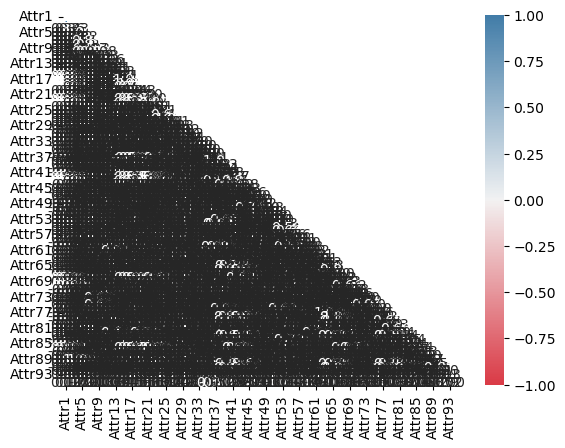

In [60]:
# The correlation matrix
# Create the correlation matrix
corr = X_resample.corr()
# Draw a heatmap of the correlation matrix
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))
# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [85]:
# Calculate the correlation matrix and take the absolute value
corr_df = X_resample.corr().abs()
# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)
# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.11)]
# Drop the features in the to_drop list
data_removeHighCorr = X_resample.drop(to_drop, axis=1)

print("drop columns of highly correlated features (r > 0.95)",to_drop)
print(f"\nThe reduced_df DataFrame has {data_removeHighCorr.shape[1]} columns.")


drop columns of highly correlated features (r > 0.95) ['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22', 'Attr23', 'Attr25', 'Attr26', 'Attr27', 'Attr29', 'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr35', 'Attr36', 'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr60', 'Attr61', 'Attr63', 'Attr64', 'Attr65', 'Attr66', 'Attr68', 'Attr70', 'Attr71', 'Attr72', 'Attr73', 'Attr75', 'Attr77', 'Attr78', 'Attr79', 'Attr80', 'Attr81', 'Attr82', 'Attr83', 'Attr84', 'Attr85', 'Attr86', 'Attr89', 'Attr90']

The reduced_df DataFrame has 16 columns.


In [62]:
testModels(models , models_name, data_removeHighCorr, y_resample,'removeHighCorr',models_f1Score, models_acurrency)
models_f1Score

/Users/zoeychiu/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,RandomForestClassifier,LogisticRegression,AdaBoostClassifier,DecisionTreeClassifier,KNeighborsClassifier
Original,0.604773,0.489011,0.653226,0.637085,0.491424
underSampling,0.840827,0.556969,0.833295,0.75752,0.58042
overSampling,0.994697,0.598001,0.948195,0.986614,0.950892
SMOTE,0.979288,0.607211,0.940151,0.950757,0.915221
ADASYN,0.977899,0.590111,0.941834,0.948945,0.909183
removeZeroVairance,0.994192,0.878272,0.934798,0.98535,0.958007
removeHighCorr,0.995454,0.598001,0.93684,0.987372,0.950892


### Selecting for Model Accuracy
- StandardScaler
- LassoCV
- GradientBoostingRegressor
- RandomForestRegressor

In [63]:
scaler = StandardScaler()
# Fit the scaler on the training features and transform these in one go
X_resample_std = scaler.fit_transform(X_resample)

testModels(models , models_name, data_removeHighCorr, y_resample,'StandardScaler',models_f1Score, models_acurrency)
models_f1Score

/Users/zoeychiu/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,RandomForestClassifier,LogisticRegression,AdaBoostClassifier,DecisionTreeClassifier,KNeighborsClassifier
Original,0.604773,0.489011,0.653226,0.637085,0.491424
underSampling,0.840827,0.556969,0.833295,0.75752,0.58042
overSampling,0.994697,0.598001,0.948195,0.986614,0.950892
SMOTE,0.979288,0.607211,0.940151,0.950757,0.915221
ADASYN,0.977899,0.590111,0.941834,0.948945,0.909183
removeZeroVairance,0.994192,0.878272,0.934798,0.98535,0.958007
removeHighCorr,0.995454,0.598001,0.93684,0.987372,0.950892
StandardScaler,0.995202,0.598001,0.93684,0.987372,0.950892


In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resample,
    y_resample,
    test_size=0.3,
    random_state=42,
    stratify=y_resample
    )

In [65]:
# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print(f'Optimal alpha = {lcv.alpha_:.3f}')

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print(f'The model explains {r_squared:.1%} of the test set variance')

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print(f'{sum(lcv_mask)} features out of {len(lcv_mask)} selected')


Optimal alpha = 248152.858
The model explains 8.9% of the test set variance
22 features out of 95 selected


In [66]:
# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=10, verbose=1)
rfe_gb.fit(X_train, y_train)

Fitting estimator with 95 features.
Fitting estimator with 85 features.
Fitting estimator with 75 features.
Fitting estimator with 65 features.
Fitting estimator with 55 features.
Fitting estimator with 45 features.
Fitting estimator with 35 features.
Fitting estimator with 25 features.
Fitting estimator with 15 features.


RFE(estimator=GradientBoostingRegressor(), n_features_to_select=10, step=10,
    verbose=1)

In [67]:
# Print the features and their ranking (high = dropped early on)
#print(dict(zip(X_resample.columns, rfe_gb.ranking_)))

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set')

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

The model can explain 81.4% of the variance in the test set


In [68]:
# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=10, verbose=1)
rfe_rf.fit(X_train, y_train)

Fitting estimator with 95 features.
Fitting estimator with 85 features.
Fitting estimator with 75 features.
Fitting estimator with 65 features.
Fitting estimator with 55 features.
Fitting estimator with 45 features.
Fitting estimator with 35 features.
Fitting estimator with 25 features.
Fitting estimator with 15 features.


RFE(estimator=RandomForestRegressor(), n_features_to_select=10, step=10,
    verbose=1)

In [69]:
# Print the features and their ranking (high = dropped early on)
#print(dict(zip(X_resample.columns, rfe_rf.ranking_)))
# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set')
# Assign the support array to rf_mask
rf_mask = rfe_rf.support_

The model can explain 97.0% of the variance in the test set


In [87]:
scaler = StandardScaler()
lm = Lasso(alpha=248152.858)
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
print("votes:",votes)
# Create a mask for features selected by at least 3 model
meta_mask = votes >= 2
# Apply the dimensionality reduction on X
X_reduced = X_resample.loc[:, meta_mask]
# Plug the reduced dataset into a linear regression pipeline
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_resample, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train_reduced), y_train_reduced)
r_squared = lm.score(scaler.transform(X_test_reduced), y_test_reduced)
print(f'The model can explain {r_squared:.1%} of the variance in the test set using {len(lm.coef_)} features.')

votes: [0 0 0 0 0 0 0 0 2 2 1 1 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 2 3 0
 0 0 2 0 0 0 0 0 2 1 1 1 0 1 0 2 0 0 0 1 1 1 0 0 0 2 0 0 0 1 1 0 0 1 1 0 2
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
[False False False False False False False False  True  True False False
 False False False False False False  True False False False False False
 False False False False False False False False False  True  True  True
 False False False  True False False False False False  True False False
 False False False False  True False False False False False False False
 False False  True False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False]
Index(['Attr9', 'Attr10', 'Attr19', 'Attr34', 'Attr35', 'Attr36', 'Attr40',
       'Attr46', 'Attr53', 'Attr63', 'Attr74'],
      dtype='object')
The model can explain -0.2% of the variance in the test set using 11 featu

$\implies$ the perfoemance is low

In [71]:
testModels(models , models_name, X_reduced, y_resample,'modelReduceFeature',models_f1Score, models_acurrency)
models_f1Score

,RandomForestClassifier,LogisticRegression,AdaBoostClassifier,DecisionTreeClassifier,KNeighborsClassifier
Original,0.604773,0.489011,0.653226,0.637085,0.491424
underSampling,0.840827,0.556969,0.833295,0.75752,0.58042
overSampling,0.994697,0.598001,0.948195,0.986614,0.950892
SMOTE,0.979288,0.607211,0.940151,0.950757,0.915221
ADASYN,0.977899,0.590111,0.941834,0.948945,0.909183
removeZeroVairance,0.994192,0.878272,0.934798,0.98535,0.958007
removeHighCorr,0.995454,0.598001,0.93684,0.987372,0.950892
StandardScaler,0.995202,0.598001,0.93684,0.987372,0.950892
modelReduceFeature,0.993182,0.364418,0.923429,0.988382,0.945801


### Selecting by Mutual Infromation

Text(0, 0.5, 'Mutual Information')

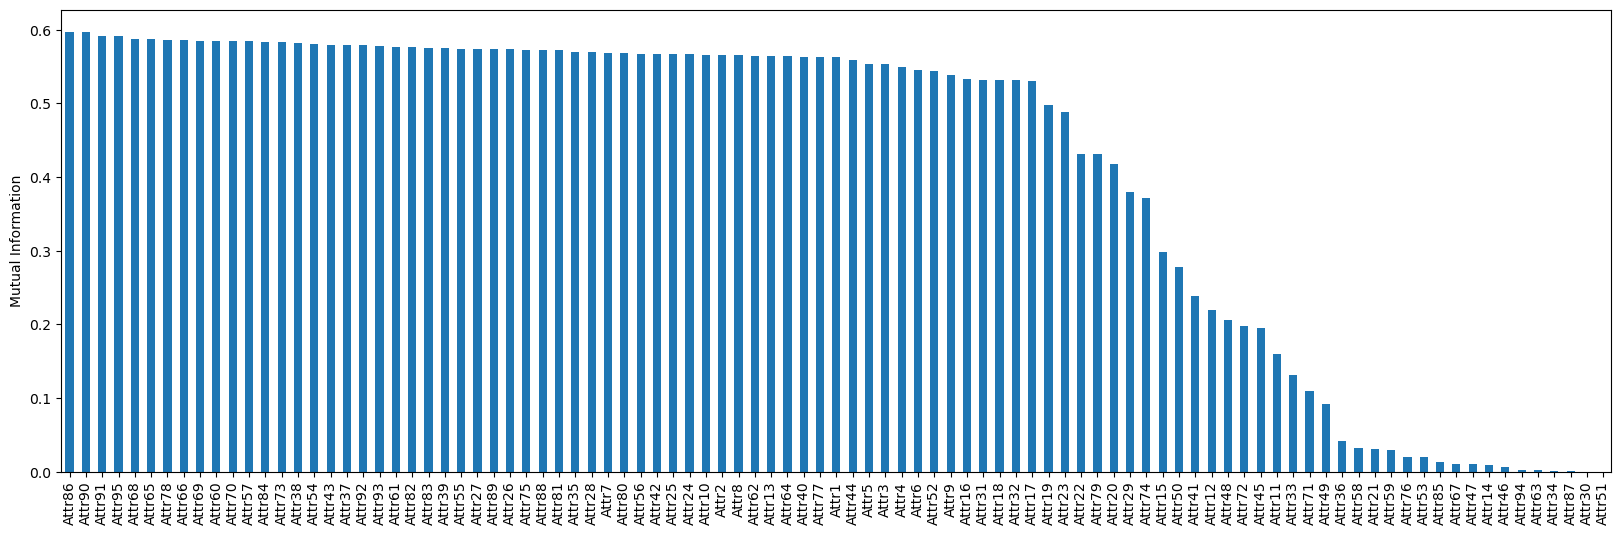

In [72]:
# the less mi value, the less information we can get from
mi = mutual_info_classif(X_resample, y_resample)
miseries = pd.Series(mi)
miseries.index = X_resample.columns
miseries.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [73]:
# select features
k_best = SelectKBest(mutual_info_classif, k=40).fit(X_resample, y_resample)
X_kBest = k_best.transform(X_resample)
# display features
#X_resample.columns[k_best.get_support()]

In [74]:
testModels(models, models_name, X_kBest, y_resample,'kBestMutualInfo',models_f1Score, models_acurrency)
models_f1Score

/Users/zoeychiu/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,RandomForestClassifier,LogisticRegression,AdaBoostClassifier,DecisionTreeClassifier,KNeighborsClassifier
Original,0.604773,0.489011,0.653226,0.637085,0.491424
underSampling,0.840827,0.556969,0.833295,0.75752,0.58042
overSampling,0.994697,0.598001,0.948195,0.986614,0.950892
SMOTE,0.979288,0.607211,0.940151,0.950757,0.915221
ADASYN,0.977899,0.590111,0.941834,0.948945,0.909183
removeZeroVairance,0.994192,0.878272,0.934798,0.98535,0.958007
removeHighCorr,0.995454,0.598001,0.93684,0.987372,0.950892
StandardScaler,0.995202,0.598001,0.93684,0.987372,0.950892
modelReduceFeature,0.993182,0.364418,0.923429,0.988382,0.945801
kBestMutualInfo,0.993434,0.870675,0.936047,0.987119,0.970935


In [75]:
models_acurrency

,RandomForestClassifier,LogisticRegression,AdaBoostClassifier,DecisionTreeClassifier,KNeighborsClassifier
Original,0.969697,0.956989,0.967253,0.956012,0.966276
underSampling,0.840909,0.568182,0.833333,0.757576,0.583333
overSampling,0.994697,0.606566,0.948232,0.986616,0.95101
SMOTE,0.979293,0.614141,0.940152,0.950758,0.915657
ADASYN,0.977902,0.599441,0.941834,0.948946,0.909576
removeZeroVairance,0.994192,0.878283,0.934848,0.985354,0.958081
removeHighCorr,0.995455,0.606566,0.936869,0.987374,0.95101
StandardScaler,0.995202,0.606566,0.936869,0.987374,0.95101
modelReduceFeature,0.993182,0.392677,0.923485,0.988384,0.94596
kBestMutualInfo,0.993434,0.870707,0.936111,0.987121,0.97096


# to-do Diyva: testModels with Hyperparameters and compare with no Hyperparameters

# to-do Ginny: model evaluation

# to-do Together: Conclusion